In [1]:
import scipy.io
import numpy as np
import operator as op

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.rcParams['figure.figsize'] = list(map(lambda x: 2*x, matplotlib.rcParams['figure.figsize']))
matplotlib.style.use('ggplot')

In [3]:
data_2 = scipy.io.loadmat('../../data2.mat')
data_1 = scipy.io.loadmat('../../data1.mat')
data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bin', 'data1_Xian', 'label1', 'spotColumn1_Xian', 'spotRow1_Xian'])

In [4]:
coorX_1 = data_1['spotRow1_Xian'][0]
coorY_1 = data_1['spotColumn1_Xian'][0]
mz_values_1 = data_1['bin'].T
mz_values_1

array([[  1996.95878277],
       [  1998.24538575],
       [  1999.53198872],
       ..., 
       [ 20005.54064941],
       [ 20006.82725239],
       [ 20008.11385537]])

In [5]:
coorY_2 = data_2['spotColumn2_Xian'][0]
coorX_2 = data_2['spotRow2_Xian'][0]
mz_values_2 = data_2['bin'].T

In [6]:
coorX_1 -= coorX_1.min()
coorY_1 -= coorY_1.min()

nrows_1 = coorX_1.max() + 1
ncols_1 = coorY_1.max() + 1
print('nrows %d, ncols %d' % (nrows_1, ncols_1))

nrows 129, ncols 154


In [7]:
coorX_2 -= coorX_2.min()
coorY_2 -= coorY_2.min()

nrows_2 = coorX_2.max() + 1
ncols_2 = coorY_2.max() + 1
print('nrows %d, ncols %d' % (nrows_2, ncols_2))

nrows 98, ncols 138


In [8]:
mask_1 = np.zeros((nrows_1, ncols_1))
for r, c in zip(coorX_1, coorY_1):
    mask_1[r,c] = 1

#plt.imshow(mask_1, cmap='binary')

In [9]:
mask_2 = np.zeros((nrows_2, ncols_2))
for r, c in zip(coorX_2, coorY_2):
    mask_2[r,c] = 1

#plt.imshow(mask_2, cmap='binary')

In [10]:
data_cube_1 = np.zeros((nrows_1, ncols_1, mz_values_1.shape[0]))
data_cube_1[coorX_1, coorY_1, :] = data_1["data1_Xian"]

data_matrix_1 = data_1['data1_Xian']
data_matrix_1.shape

(9577, 14000)

In [11]:
data_cube_2 = np.zeros((nrows_2, ncols_2, mz_values_2.shape[0]))
data_cube_2[coorX_2, coorY_2, :] = data_2["data2_Xian"]

data_matrix_2 = data_2['data2_Xian']
data_matrix_2.shape

(6869, 14000)

In [12]:
row2grid_1 = {r: (coorX_1[r], coorY_1[r]) for r in range(data_matrix_1.shape[0])}
grid2row_1 = {(coorX_1[r], coorY_1[r]): r for r in range(data_matrix_1.shape[0])}

get_bin_1 = lambda mz: np.argmin(np.abs(mz_values_1 - mz))

real_rows_1 = []
real_rows_xy_1 = []
for r in range(nrows_1):
    for c in range(ncols_1):
        try:
            row_1 = grid2row_1[(r, c)]
            real_rows_xy_1.append((r, c))
            real_rows_1.append(row_1)
        except:
            pass
        
real_rows_1 = np.array(real_rows_1)
real_rows_1.shape

real_rows_xy_1 = np.array(np.array(real_rows_xy_1))
real_rows_xy_1.shape

(9577, 2)

In [13]:
row2grid_2 = {r: (coorX_2[r], coorY_2[r]) for r in range(data_matrix_2.shape[0])}
grid2row_2 = {(coorX_2[r], coorY_2[r]): r for r in range(data_matrix_2.shape[0])}

get_bin_2 = lambda mz: np.argmin(np.abs(mz_values_2 - mz))

real_rows_2 = []
real_rows_xy_2 = []
for r in range(nrows_2):
    for c in range(ncols_2):
        try:
            row_2 = grid2row_2[(r, c)]
            real_rows_xy_2.append((r, c))
            real_rows_2.append(row_2)
        except:
            pass
        
real_rows_2 = np.array(real_rows_2)
#real_rows_2.shape

real_rows_xy_2 = np.array(np.array(real_rows_xy_2))
#real_rows_xy_2.shape

In [14]:
def make_image_1(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_1 = np.zeros((nrows_1, ncols_1)) + 1   
    for r in range(nrows_1):
        for c in range(ncols_1):
            try:
                row = grid2row_1[(r, c)]
                img_1[r, c] = rows[row]
            except:
                pass
    return img_1

def make_image_real_1(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_1 = np.zeros((nrows_1, ncols_1)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_1[idx]
        img_1[x, y] = val
    return img_1

In [15]:
def make_image_2(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img_2 = np.zeros((nrows_2, ncols_2)) + 1   
    for r in range(nrows_2):
        for c in range(ncols_2):
            try:
                row = grid2row_2[(r, c)]
                img_2[r, c] = rows[row]
            except:
                pass
    return img_2

def make_image_real_2(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img_2 = np.zeros((nrows_2, ncols_2)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy_2[idx]
        img_2[x, y] = val
    return img_2

In [16]:
bin_idx_1 = get_bin_1(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

#bin_img_1 = make_image_1(data_matrix_1[:, bin_idx_1]) 

#plt.imshow(np.log10(1+bin_img_1), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
#plt.colorbar()
#python 3

In [17]:
bin_idx_2 = get_bin_2(5800) # molecular mass 5800
#plt.imshow(data_cube[:,:, insulin_bin_idx])

#bin_img_2 = make_image_2(data_matrix_2[:, bin_idx_2]) 

#plt.imshow(np.log10(1+bin_img_2), cmap = 'viridis') # log10 changes the distribution so we can see what's going on better
#plt.colorbar()
#python 3

In [18]:
#plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)
#in m/z = 5800, each 'pixel' intensity

In [19]:
#plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)
#in m/z = 5800, each 'pixel' intensity

Normalization TIC

In [20]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_1_ = data_matrix_1.astype(np.float64)
row_sums_1 = data_matrix_1_.sum(axis=1)
data_matrix_1 = data_matrix_1_ / row_sums_1[:, np.newaxis]
data_matrix_1.shape

(9577, 14000)

In [21]:
#plt.hist(np.log10(1+data_matrix_1[:, bin_idx_1]), bins=50)

In [22]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_2_ = data_matrix_2.astype(np.float64)
row_sums_2 = data_matrix_2_.sum(axis=1)
data_matrix_ = data_matrix_2_ / row_sums_2[:, np.newaxis]
data_matrix_.shape
#plt.hist(np.log10(1+data_matrix_2[:, bin_idx_2]), bins=50)

(6869, 14000)

9577 labels, 9577 real data points, 399 positives


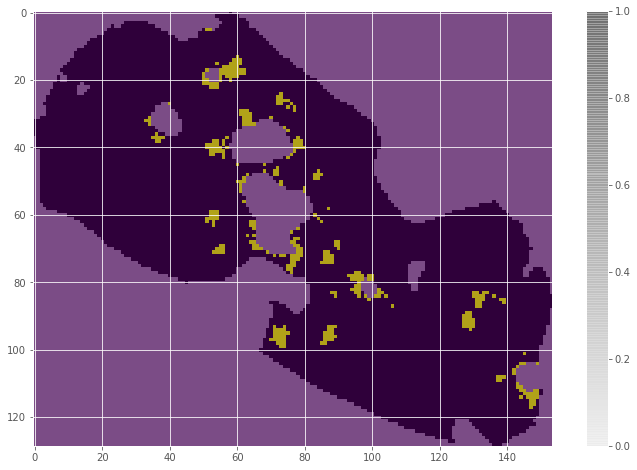

In [23]:
cutoff_1 = 0.005

labels_1 = data_matrix_1[:, bin_idx_1] > cutoff_1
print('%d labels, %d real data points, %d positives' % (len(labels_1), len(labels_1[real_rows_1]), sum(labels_1)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
plt.imshow(make_image_real_1(labels_1[real_rows_1]))
plt.imshow(mask_1, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

plt.colorbar()
#python 3

6869 labels, 6869 real data points, 89 positives


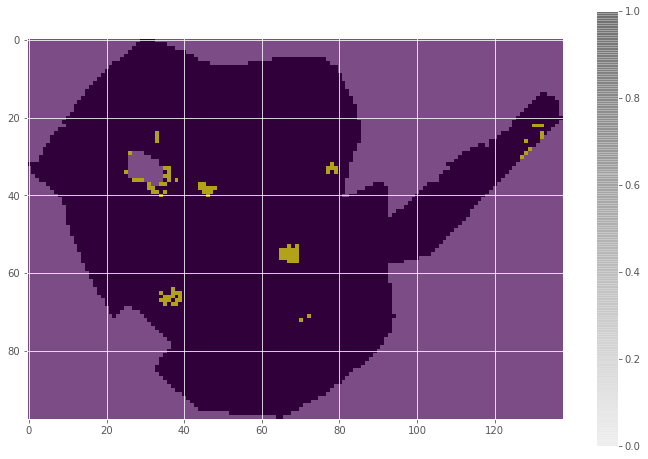

In [24]:
cutoff_2 = 0.005

labels_2 = data_matrix_[:, bin_idx_2] > cutoff_2
print('%d labels, %d real data points, %d positives' % (len(labels_2), len(labels_2[real_rows_2]), sum(labels_2)))
#plt.imshow(make_image(labels))
#plt.imshow(make_image(labels[real_rows]))
plt.imshow(make_image_real_2(labels_2[real_rows_2]))
plt.imshow(mask_2, cmap='binary',alpha = 0.3)
#plt.imshow(np.log10(1+bin_img),alpha = 0.5) # log10 changes the distribution so we can see what's going on better

plt.colorbar()
#python 3

In [25]:
real_labels_1 = labels_1[real_rows_1]
real_data_1 = data_matrix_1[real_rows_1, :]
real_data_1 = real_data_1[:, np.arange(data_matrix_1.shape[1]) != bin_idx_1]
real_data_1.shape

(9577, 13999)

In [26]:
bin_idx_ = get_bin_1(5800)
bin_idx_

2956

In [27]:
#filtering out m/z bins that are strongly correlated to your target bin (i.e., bins in the range 5790-5810)
index_1 = np.arange(data_matrix_1.shape[1])[2946:2966]
data_left_1 = np.delete(data_matrix_1[real_rows_1, :],index_1,1)
data_left_1.shape

(9577, 13980)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
def partial_data2(data_matrix_,labels_2, data_left_1,real_labels_1):

    index_pos = np.where(labels_2)
    data_pos = data_matrix_[index_pos]
    data_neg = np.delete(data_matrix_, index_pos, 0)
    data_pos_left_index = np.random.randint(0,data_pos.shape[0],9)
    data_neg_left_index = np.random.randint(0,data_neg.shape[0],678)

    data_pos_left = data_pos[data_pos_left_index]
    data_neg_left = data_neg[data_neg_left_index]

    data_matrix_2 = np.concatenate((data_pos_left, data_neg_left), axis=0)

    row2grid_2 = {r: (coorX_2[r], coorY_2[r]) for r in range(data_matrix_2.shape[0])}
    grid2row_2 = {(coorX_2[r], coorY_2[r]): r for r in range(data_matrix_2.shape[0])}

    get_bin_2 = lambda mz: np.argmin(np.abs(mz_values_2 - mz))

    real_rows_2 = []
    real_rows_xy_2 = []
    for r in range(nrows_2):
        for c in range(ncols_2):
            try:
                row_2 = grid2row_2[(r, c)]
                real_rows_xy_2.append((r, c))
                real_rows_2.append(row_2)
            except:
                pass
        
    real_rows_2 = np.array(real_rows_2)
#real_rows_2.shape

    real_rows_xy_2 = np.array(np.array(real_rows_xy_2))
#real_rows_xy_2.shape

    real_labels_2 = labels_2[real_rows_2]
    real_data_2 = data_matrix_2[real_rows_2, :]
    real_data_2 = real_data_2[:, np.arange(data_matrix_2.shape[1]) != bin_idx_2]

    bin_idx__ = get_bin_2(5800)

    index_2 = np.arange(data_matrix_2.shape[1])[2946:2966]
    data_left_2 = np.delete(data_matrix_2[real_rows_2, :],index_2,1)

    real_data_1 = data_left_1
    real_data_2 = data_left_2
    real_labels = np.concatenate((real_labels_1, real_labels_2), axis=0)
    real_data = np.concatenate((real_data_1, real_data_2), axis=0)

    data_pp = SelectKBest(k=500).fit_transform(real_data, real_labels)
    index_1_ = np.arange(data_pp.shape[0])[0:9577]
    data_pp_1 = data_pp[index_1_,:]
    index_2_ = np.arange(data_pp.shape[0])[9577:10264]
    data_pp_2 = data_pp[index_2_,:]
    
    minvals_1 = np.amin(data_pp_1, 0)
    maxvals_1 = np.amax(data_pp_1, 0)
    ranges_1 = 1.0 / (maxvals_1 - minvals_1)
    scaler_1 = np.diag(ranges_1)

    data_pp_scaled_1 = np.dot(data_pp_1, scaler_1)
    data_pp_scaled_1.shape
    
    minvals_2 = np.amin(data_pp_2, 0)
    maxvals_2 = np.amax(data_pp_2, 0)
    ranges_2 = 1.0 / (maxvals_2 - minvals_2)
    scaler_2 = np.diag(ranges_2)

    data_pp_scaled_2 = np.dot(data_pp_2, scaler_2)
    data_pp_scaled_2.shape
    
    return real_rows_xy_1, data_pp_scaled_1, real_rows_xy_2, data_pp_scaled_2, real_labels_2

SVM

Code to run nested cross-validation experiment, which involves

    outer cross-validation: 2 folds, returns list of (auc, predictions) per fold
    inner cross-validation: tuning hyperparameters (using 2x3 fold cv)



In [30]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import optunity
import optunity.metrics
import optunity.cross_validation

import numpy as np
from sklearn import linear_model

# data2 SVM

In [31]:
def nested_cv_data2_SVM(data_2,real_labels_2):
    
    @optunity.cross_validated(x=data_2, y=real_labels_2, num_folds=2,
                         aggregator=optunity.cross_validation.identity)
    def nested_cv_data2SVM(x_train, y_train, x_test, y_test):

    # extract spatial location of pixels (first 2 cols)
        x_train = x_train[:, 2:]
        rows = x_test[:, 0]
        cols = x_test[:, 1]
        x_test = x_test[:, 2:]
    
    # inner cross-validation to estimate performance of a set of hyperparameters
        @optunity.cross_validated(x=x_train, y=y_train, num_folds=3, num_iter=2)
        def inner_cv_data2SVM(x_train, y_train, x_test, y_test, C):
            model_SVM = LinearSVC(C=C).fit(x_train, y_train)
            predictions_SVM = model_SVM.decision_function(x_test)
            roc_SVM = optunity.metrics.roc_auc(y_test, predictions_SVM)
        #print('auroc in xval: %1.3f' % roc)
            return roc_SVM
    
        hpars, info, _ = optunity.maximize(inner_cv_data2SVM, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
    #print('')
    #print('Hyperparameters: ' + str(hpars))
    #print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
        model_SVM = LinearSVC(**hpars).fit(x_train, y_train)
        predictions_SVM = model_SVM.decision_function(x_test)
        auc_SVM = optunity.metrics.roc_auc(y_test, predictions_SVM)
        return (auc_SVM, np.vstack((rows, cols, predictions_SVM)),np.vstack((rows, cols, y_test)))

    res_SVM = nested_cv_data2SVM()
    mean_roc_auc_SVM = sum(map(op.itemgetter(0), res_SVM)) / len(res_SVM)
    
    predictions_SVM = np.hstack(map(op.itemgetter(1), res_SVM))
    y_test_SVM = np.hstack(map(op.itemgetter(2), res_SVM))
    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc_SVM)
    return mean_roc_auc_SVM, predictions_SVM, y_test_SVM

# data1_SVM model on data2 and SGDClassifier

In [32]:
# extend data matrix to include spatial location of pixels in first 2 cols


def nested_cv_using_fresh_cvdata(data_1,data_2,real_labels_1,real_labels_2):
    #iterations = iterations
    @optunity.cross_validated(x=data_1, y=real_labels_1, num_folds=2, aggregator=optunity.cross_validation.identity)
    def nested_cv(x_train, y_train, x_test, y_test):

        # extract spatial location of pixels (first 2 cols)
        x_train = x_train[:, 2:]
        rows = x_test[:, 0]
        cols = x_test[:, 1]
        x_test = x_test[:, 2:]
    
        # inner cross-validation to estimate performance of a set of hyperparameters
        @optunity.cross_validated(x=x_train, y=y_train, num_folds=3, num_iter=2)
        def inner_cv(x_train, y_train, x_test, y_test, C):
            model = LinearSVC(C=C).fit(x_train, y_train)
            predictions = model.decision_function(x_test)
            roc = optunity.metrics.roc_auc(y_test, predictions)
            #print('auroc in xval: %1.3f' % roc)
            return roc
    
        hpars, info, _ = optunity.maximize(inner_cv, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
        #print('')
        #print('Hyperparameters: ' + str(hpars))
        #print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
        model = LinearSVC(**hpars).fit(x_train, y_train)
        predictions = model.decision_function(x_test)
        auc = optunity.metrics.roc_auc(y_test, predictions)
        coef_ = model.coef_
        intercept_ = model.intercept_ 
        return (auc, np.vstack((rows, cols, predictions)),np.vstack((rows, cols, y_test)),coef_,intercept_, model)

    res = nested_cv()
    mean_roc_auc = sum(map(op.itemgetter(0), res)) / len(res)

    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc)
    
    coef = res[0][3]
    intercept = res[0][4]
    model = res[0][5]
    const_a = 1/6869*1
    
    
    @optunity.cross_validated(x=data_2, y=real_labels_2, num_folds=2, aggregator=optunity.cross_validation.identity)
    def nested_cv_1(x_train, y_train, x_test, y_test):

        # extract spatial location of pixels (first 2 cols)
        x_train = x_train[:, 2:]
        rows = x_test[:, 0]
        cols = x_test[:, 1]
        x_test = x_test[:, 2:]
    
        clf = linear_model.SGDClassifier(alpha = const_a,warm_start = True,n_iter = 10)
        clf.fit(x_train, y_train,coef_init=coef, intercept_init=intercept)
        niter_ = clf.n_iter
        predictions_SGD = clf.decision_function(x_test)
        auc_SGD = optunity.metrics.roc_auc(y_test, predictions_SGD)
        
        predictions_None = model.decision_function(x_test)
        auc_None = optunity.metrics.roc_auc(y_test, predictions_None)
        return (auc_SGD, auc_None, np.vstack((rows, cols, predictions_SGD)),np.vstack((rows, cols, predictions_None)),np.vstack((rows, cols, y_test)))
    
    res_1 = nested_cv_1()
    mean_roc_auc_SGD = sum(map(op.itemgetter(0), res_1)) / len(res_1)
    mean_roc_auc_None = sum(map(op.itemgetter(1), res_1)) / len(res_1)
    
    predictions_SGD= np.hstack(map(op.itemgetter(2), res_1))
    predictions_None= np.hstack(map(op.itemgetter(3), res_1))
    y_test_ = np.hstack(map(op.itemgetter(4), res_1))
    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation-1: %1.3f' % mean_roc_auc_1)
    
    #niter = res_1[0][4]
    
    return mean_roc_auc_SGD, mean_roc_auc_None, predictions_SGD,predictions_None,y_test_ 

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [35]:
all_data = []

auc1s = []
auc2s = []
auc3s = []

xxs = np.linspace(0, 1, 100)
all_tprsSVM = []
all_tprsSGD = []
all_tprsNone = []

#niters = []
# iteration time
total = 10
xs = [x for x in range(1,total+1)]
for x in range(0, total):
        #print(iterations)
    #partialData = get10percentData()
    
    real_rows_xy_1, data_pp_scaled_1, real_rows_xy_2, data_pp_scaled_2,real_labels_2 = partial_data2(data_matrix_,labels_2, data_left_1,real_labels_1)
    
    data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))
    data_1 = np.hstack((real_rows_xy_1, data_pp_scaled_1))
    
    
    auc1, predictionsSVM, y_testSVM = nested_cv_data2_SVM(data_2,real_labels_2)
    auc2, auc3, predictionsSGD, predictionsNone, yTest = nested_cv_using_fresh_cvdata(data_1,data_2,real_labels_1,real_labels_2)
    
    auc1s.append(auc1)
    auc2s.append(auc2)
    auc3s.append(auc3)
    
    fpr_SVM,tpr_SVM,threshold_SVM = roc_curve(y_testSVM[2, :], predictionsSVM[2, :])
    fpr_SGD,tpr_SGD,threshold_SGD = roc_curve(yTest[2, :], predictionsSGD[2, :])
    fpr_None,tpr_None,threshold_None = roc_curve(yTest[2, :], predictionsNone[2, :])
    
    new_tprSVM = np.interp(xxs, fpr_SVM, tpr_SVM)
    new_tprSGD = np.interp(xxs, fpr_SGD, tpr_SGD)
    new_tprNone = np.interp(xxs, fpr_None, tpr_None)
    
    all_tprsSVM.append(new_tprSVM)
    all_tprsSGD.append(new_tprSGD)
    all_tprsNone.append(new_tprNone)
    
    #niters.append(niter)

    
    #data_to_plot = [auc1s, auc2s]
    #plt.boxplot(data_to_plot)
    #if y == 0:

all_data = [auc1s, auc2s,auc3s]

tprsSVM = np.array(all_tprsSVM)
tprsSGD = np.array(all_tprsSGD)
tprsNone = np.array(all_tprsNone)


mean_tprsSVM = tprsSVM.mean(axis=0) # MEAN
mean_tprsSGD = tprsSGD.mean(axis=0)
mean_tprsNone = tprsNone.mean(axis=0)

std_SVM = tprsSVM.std(axis=0) # Standard deviation
std_SGD= tprsSGD.std(axis=0)
std_None = tprsNone.std(axis=0)                     
                      
tprs_upperSVM = np.minimum(mean_tprsSVM + std_SVM, 1) # to draw std
tprs_lowerSVM = mean_tprsSVM - std_SVM

tprs_upperSGD = np.minimum(mean_tprsSGD + std_SGD, 1) # to draw std
tprs_lowerSGD = mean_tprsSGD - std_SGD

tprs_upperNone = np.minimum(mean_tprsNone + std_None, 1) # to draw std
tprs_lowerNone = mean_tprsNone - std_None




/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metrics.py:204: RuntimeWarning: invalid value encountered in true_divide
  return float(TP) / (TP + FN)
/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metrics.py:204: RuntimeWarning: invalid value encountered in true_divide
  return float(TP) / (TP + FN)
/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metrics.py:204: RuntimeWarning: invalid value encountered in true_divide
  return float(TP) / (TP + FN)
/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metrics.py:204: RuntimeWarning: invalid value encountered in true_divide
  return float(TP) / (TP + FN)
/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metrics.py:204: RuntimeWarning: invalid value encountered in true_divide
  return float(TP) / (TP + FN)
/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/optunity/metric

# boxplot

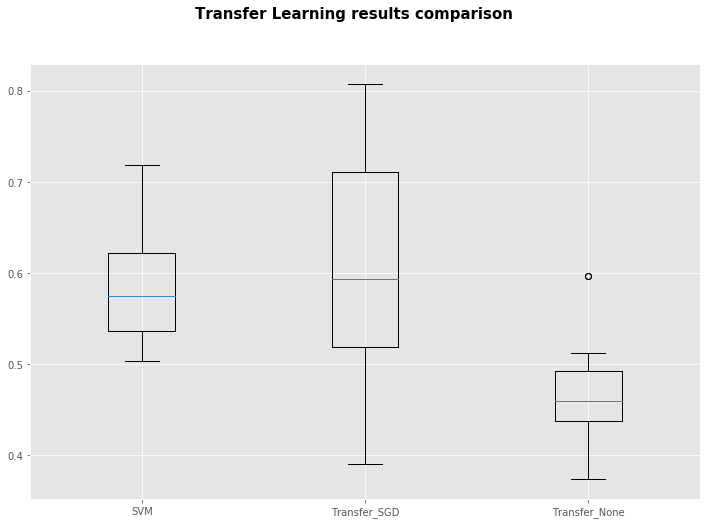

In [36]:
fig = plt.figure()
fig.suptitle('Transfer Learning results comparison', fontsize=15, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xticklabels(['SVM', 'Transfer_SGD', 'Transfer_SVM'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.boxplot(all_data)
plt.boxplot(all_data)
#ax.set_title('axes title')
plt.xticks([1,2,3],['SVM', 'Transfer_SGD', 'Transfer_None'])
#ax.set_ylabel('ylabel')
plt.show()

# ROC

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


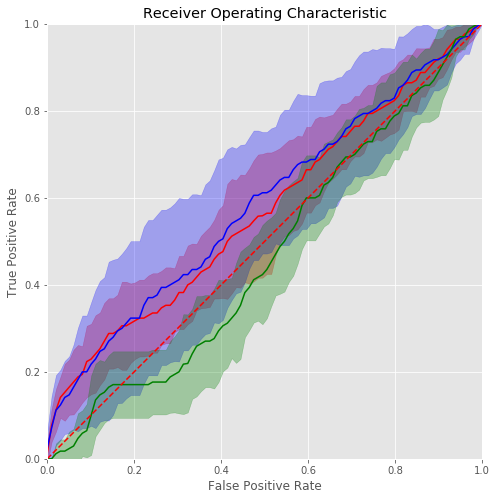

In [37]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(xxs, mean_tprsSVM, 'r')
plt.fill_between(xxs, tprs_lowerSVM, tprs_upperSVM, color='red', alpha=0.3) # std area :)
plt.plot(xxs, mean_tprsSGD, 'b')
plt.fill_between(xxs, tprs_lowerSGD, tprs_upperSGD, color='blue', alpha=0.3) # std area :)
plt.plot(xxs, mean_tprsNone, 'g')
plt.fill_between(xxs, tprs_lowerNone, tprs_upperNone, color='green', alpha=0.3) # std area :)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()